In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os
import math
from itertools import combinations

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)  

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\DataMiningBTL\\helpers\\EDA.py'>

In [2]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc

In [3]:
df = pd.read_csv(ROOT + "/data/bank/bank-full.csv", sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
obj_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y']
con_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# job

In [6]:
df.groupby("job")[con_features].mean()

,age,balance,duration,campaign,pdays,previous
job,,,,,,
admin.,39.289886,1135.838909,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,246.656716,2.299574,57.041578,0.953092


In [7]:
df.groupby("job")[con_features].mean().std()

age           8.032536
balance     305.189240
duration     15.884526
campaign      0.280482
pdays        10.116744
previous      0.165220
dtype: float64

* group by job khiến phân phối balance, duration, pdays có độ lệch chuẩn khá nhiều

job
admin.           Axes(0.125,0.11;0.775x0.77)
blue-collar      Axes(0.125,0.11;0.775x0.77)
entrepreneur     Axes(0.125,0.11;0.775x0.77)
housemaid        Axes(0.125,0.11;0.775x0.77)
management       Axes(0.125,0.11;0.775x0.77)
retired          Axes(0.125,0.11;0.775x0.77)
self-employed    Axes(0.125,0.11;0.775x0.77)
services         Axes(0.125,0.11;0.775x0.77)
student          Axes(0.125,0.11;0.775x0.77)
technician       Axes(0.125,0.11;0.775x0.77)
unemployed       Axes(0.125,0.11;0.775x0.77)
unknown          Axes(0.125,0.11;0.775x0.77)
Name: balance, dtype: object

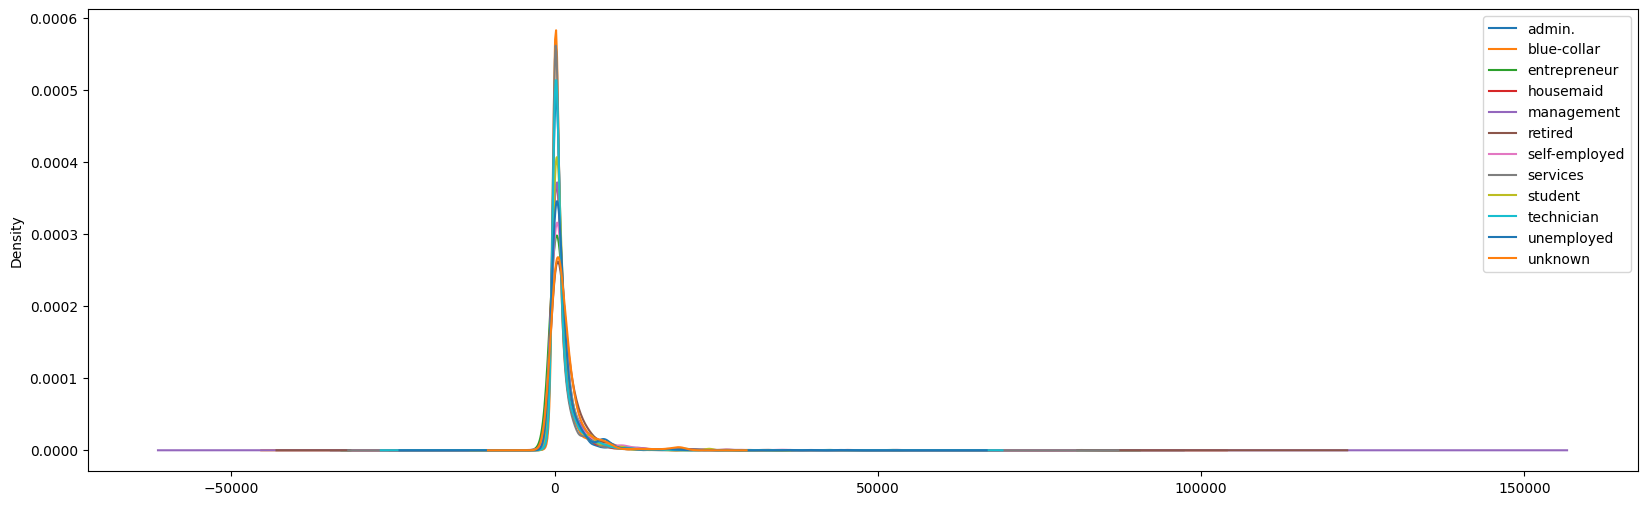

In [8]:
df.groupby("job")["balance"].plot(kind="kde", legend=True, figsize=(20, 6))

job
admin.           Axes(0.125,0.11;0.775x0.77)
blue-collar      Axes(0.125,0.11;0.775x0.77)
entrepreneur     Axes(0.125,0.11;0.775x0.77)
housemaid        Axes(0.125,0.11;0.775x0.77)
management       Axes(0.125,0.11;0.775x0.77)
retired          Axes(0.125,0.11;0.775x0.77)
self-employed    Axes(0.125,0.11;0.775x0.77)
services         Axes(0.125,0.11;0.775x0.77)
student          Axes(0.125,0.11;0.775x0.77)
technician       Axes(0.125,0.11;0.775x0.77)
unemployed       Axes(0.125,0.11;0.775x0.77)
unknown          Axes(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

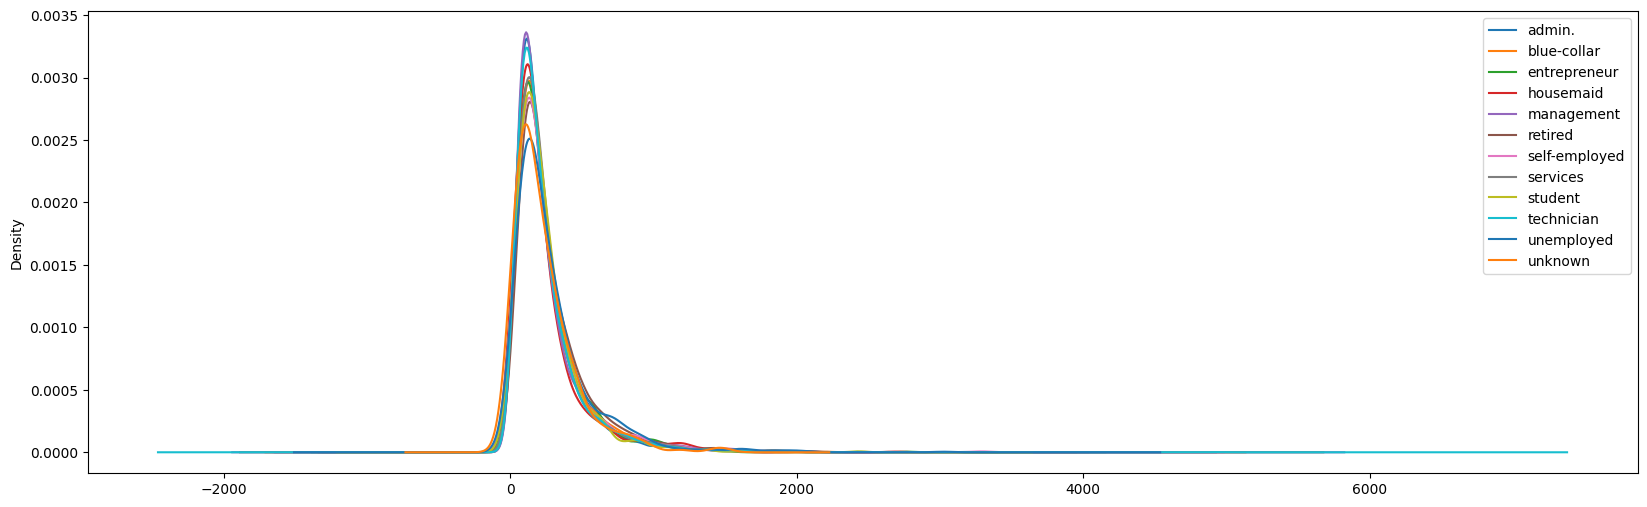

In [9]:
df.groupby("job")["duration"].plot(kind="kde", legend=True, figsize=(20, 6))

job
admin.           Axes(0.125,0.11;0.775x0.77)
blue-collar      Axes(0.125,0.11;0.775x0.77)
entrepreneur     Axes(0.125,0.11;0.775x0.77)
housemaid        Axes(0.125,0.11;0.775x0.77)
management       Axes(0.125,0.11;0.775x0.77)
retired          Axes(0.125,0.11;0.775x0.77)
self-employed    Axes(0.125,0.11;0.775x0.77)
services         Axes(0.125,0.11;0.775x0.77)
student          Axes(0.125,0.11;0.775x0.77)
technician       Axes(0.125,0.11;0.775x0.77)
unemployed       Axes(0.125,0.11;0.775x0.77)
unknown          Axes(0.125,0.11;0.775x0.77)
Name: pdays, dtype: object

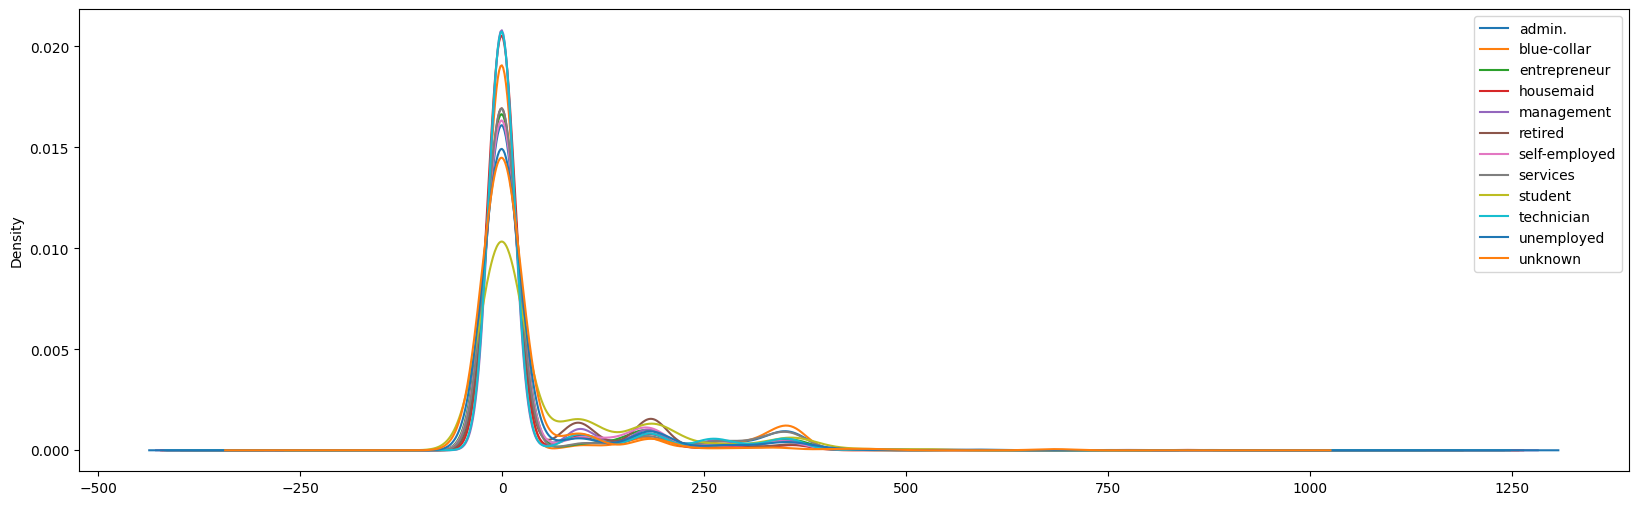

In [10]:
df.groupby("job")["pdays"].plot(kind="kde", legend=True, figsize=(20, 6))

* miền giá trị trải dài giữa những ngành nghề có sự chênh lệch. phân phối dành cho ngành nghề cũng chênh lệch nhiều (std cao)

# default (có nợ xấu không)

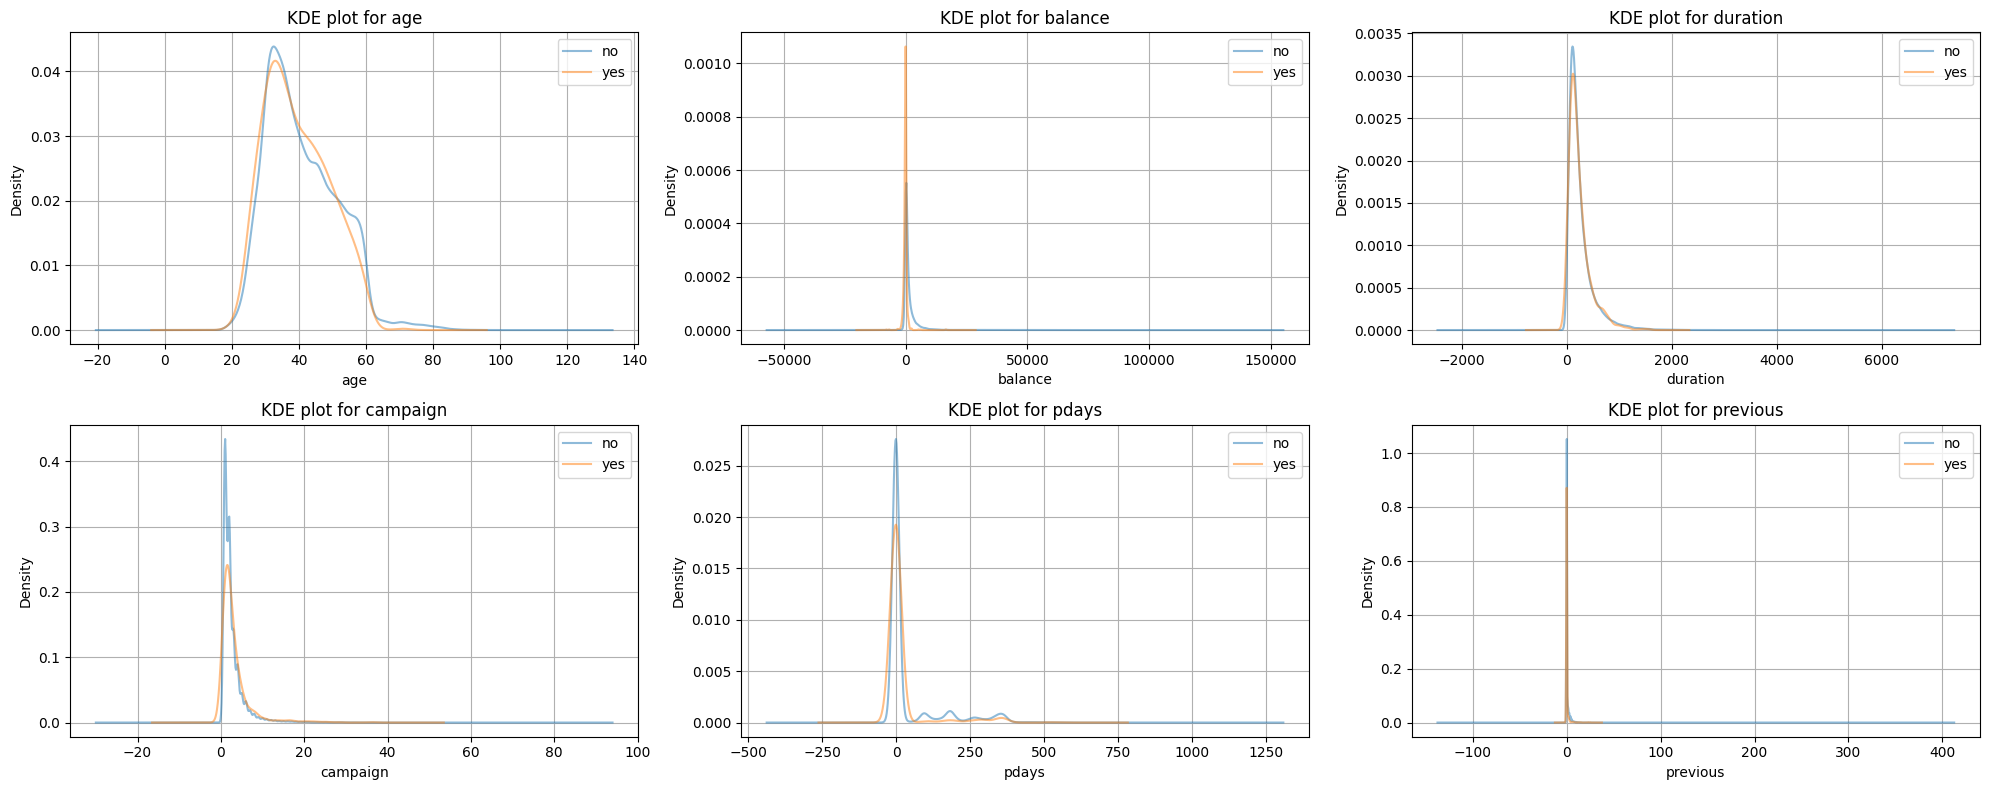

In [25]:
n_cols = 3
n_rows = (len(con_features) // n_cols) + (1 if len(con_features) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

for i, c in enumerate(con_features):
    ax = axes[i // n_cols, i % n_cols]
    df.groupby("default")[c].plot(kind="kde", alpha=0.5, ax=ax, legend=True)
    ax.set_title(f"KDE plot for {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [22]:
df.groupby("default")[con_features].mean().std()

age            1.009016
balance     1080.056792
duration      13.716041
campaign       0.276964
pdays         15.953454
previous       0.224388
dtype: float64

* nợ xấu phân phối đều với tuổi, campaign (số lần liên hệ), previous (Số lần liên hệ trước đó trong các chiến dịch khác), pdays (vì có giá trị -1 nên chưa xét tới), duration (thời lượng)
* nợ xấu khiến balance (số dư hàng năm) phân phối không đều (std cao)
* với nhóm nợ xấu, tần suất để số dư ở ngưỡng 0 nhiều. ngược lại với nhóm không nợ xấu, tần suất số dư ngưỡng 0 thấp hơn nhiều và balance có miền giá trị trải dài hơn

==> default (nợ xấu) là feature quan trọng

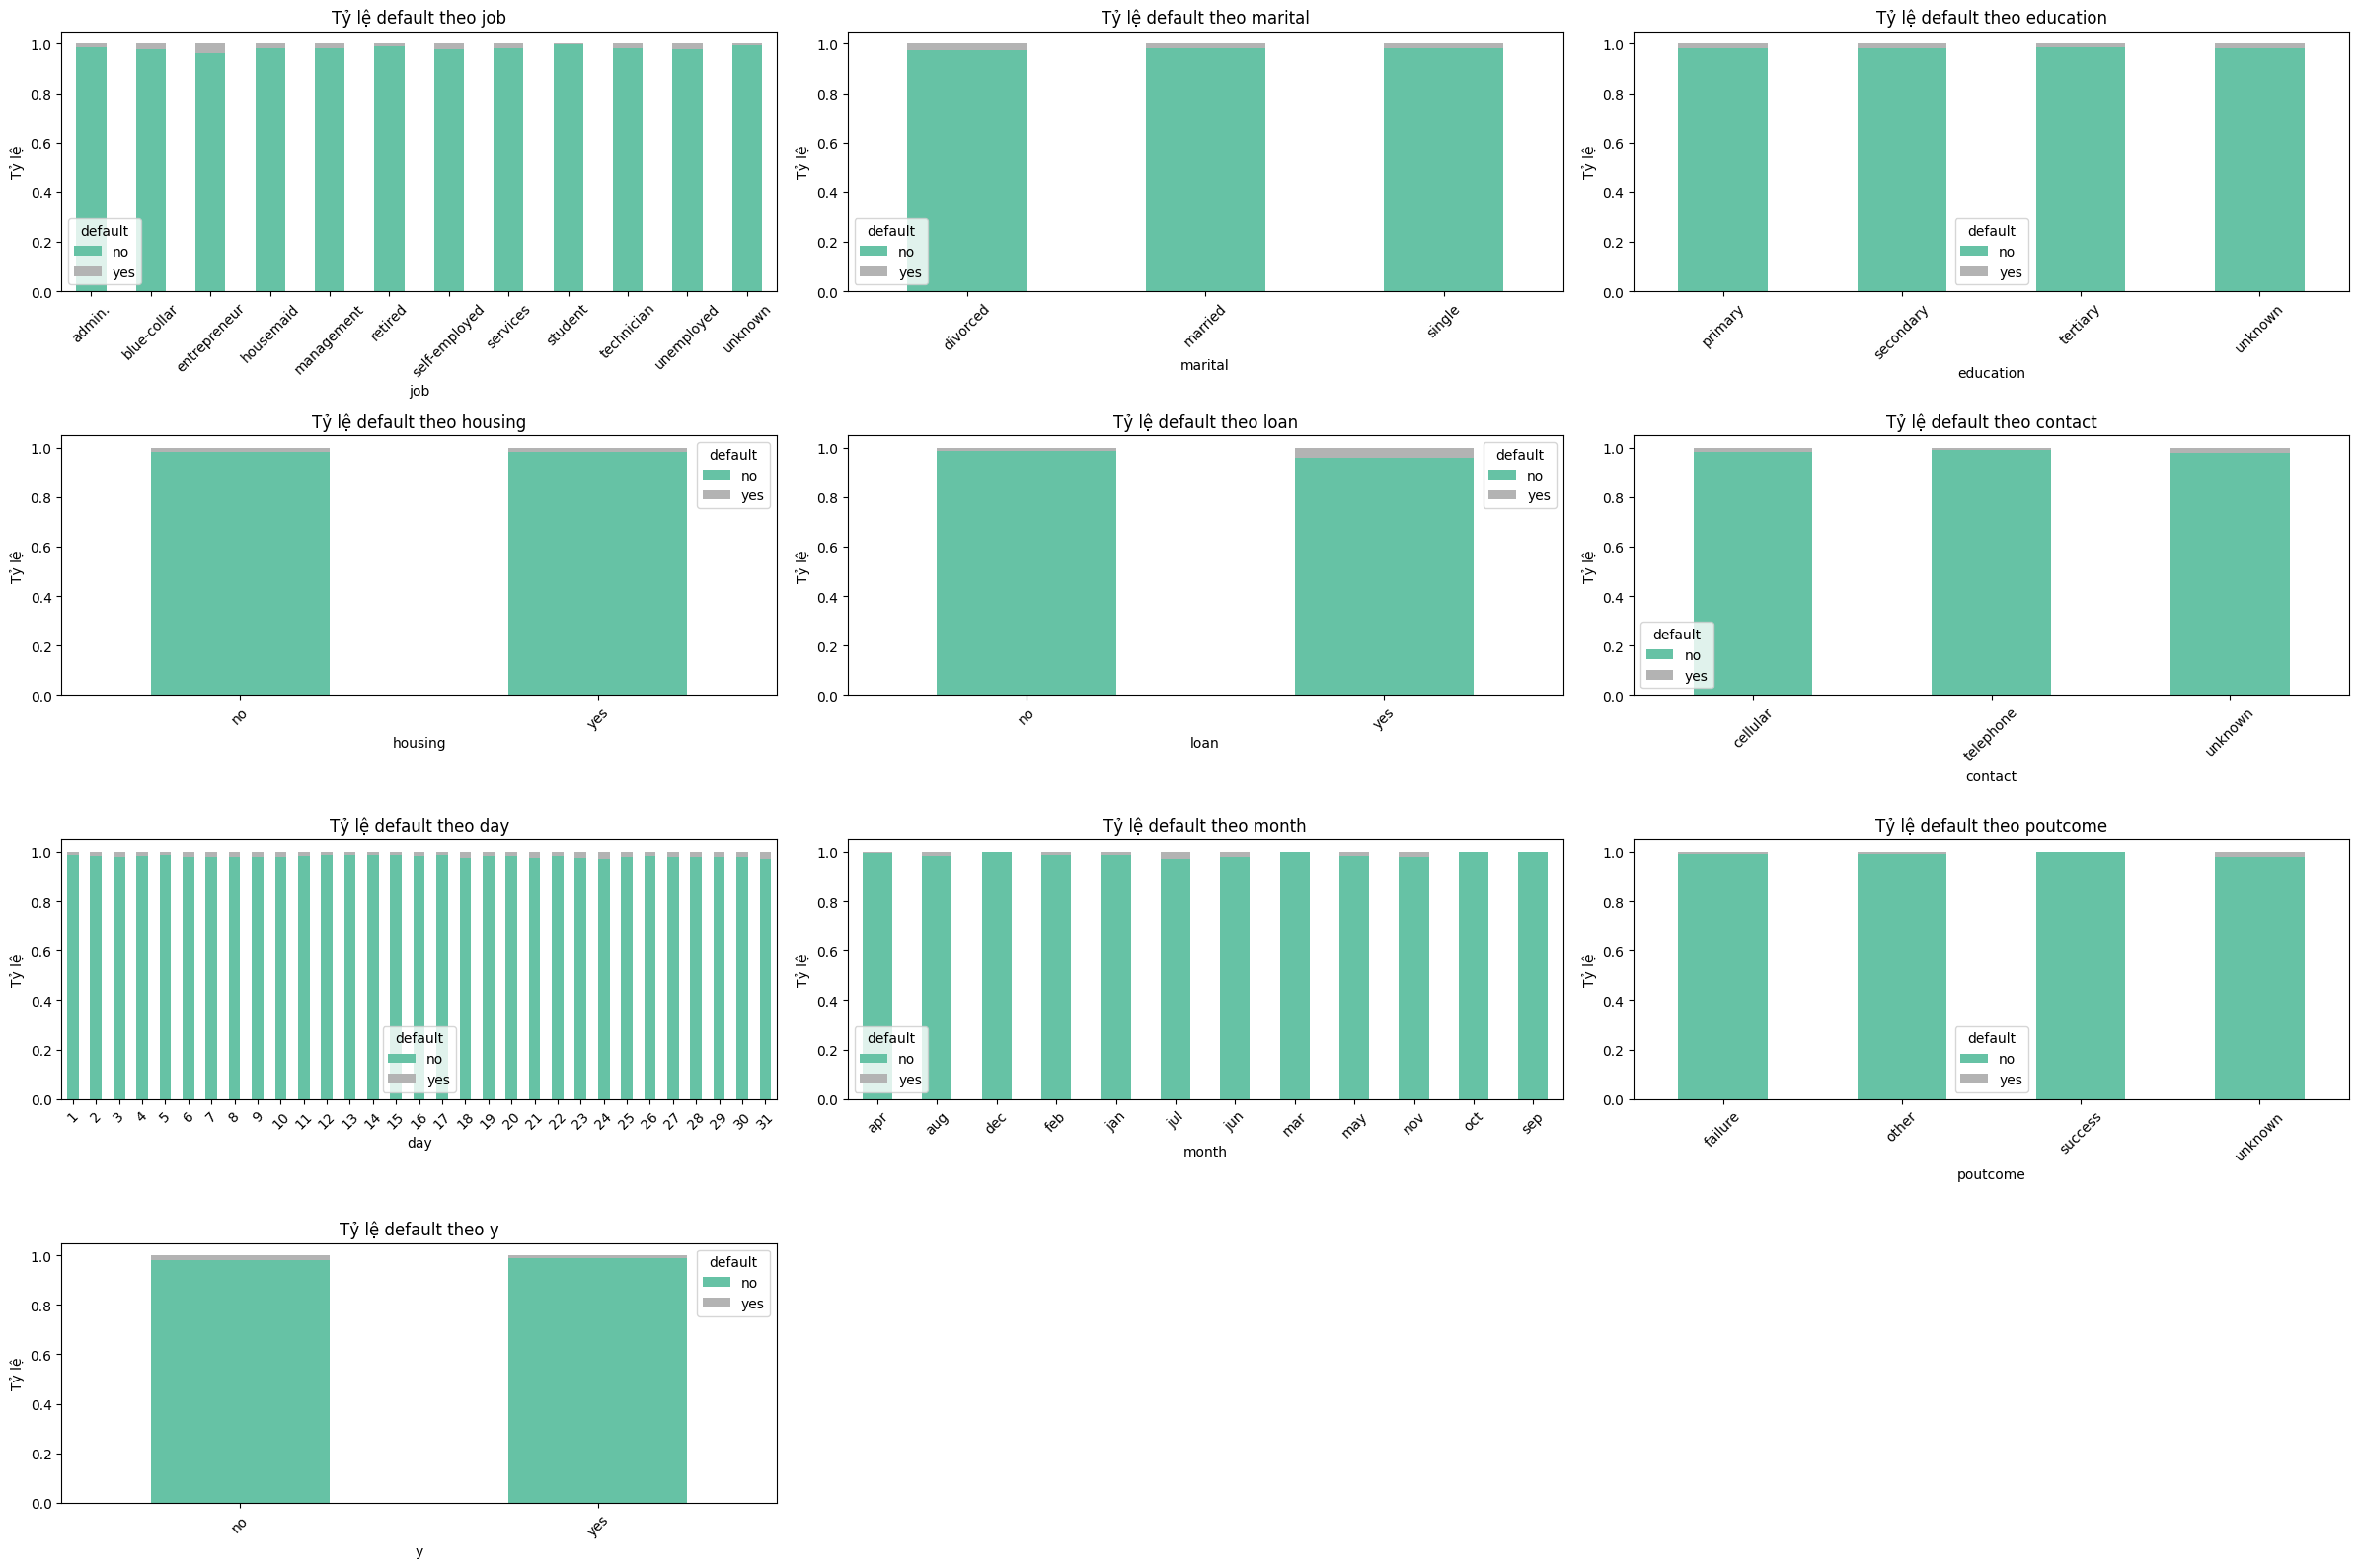

In [65]:
cols = [col for col in obj_features if col != "default"]
n = len(cols)
n_cols = 3 
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(cols):
    cross_tab = pd.crosstab(df[col], df["default"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap="Set2")
    axes[idx].set_title(f"Tỷ lệ default theo {col}")
    axes[idx].set_ylabel("Tỷ lệ")
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# housing (vay mua nhà)

In [66]:
df.groupby("housing")[con_features].mean()

,age,balance,duration,campaign,pdays,previous
housing,,,,,,
no,43.139883,1596.501270,256.700911,2.845625,26.288581,0.484787
yes,39.175288,1175.103064,259.331476,2.698488,51.312495,0.656665


In [67]:
df.groupby("housing")[con_features].mean().std()

age           2.803392
balance     297.973529
duration      1.860090
campaign      0.104042
pdays        17.694579
previous      0.121537
dtype: float64

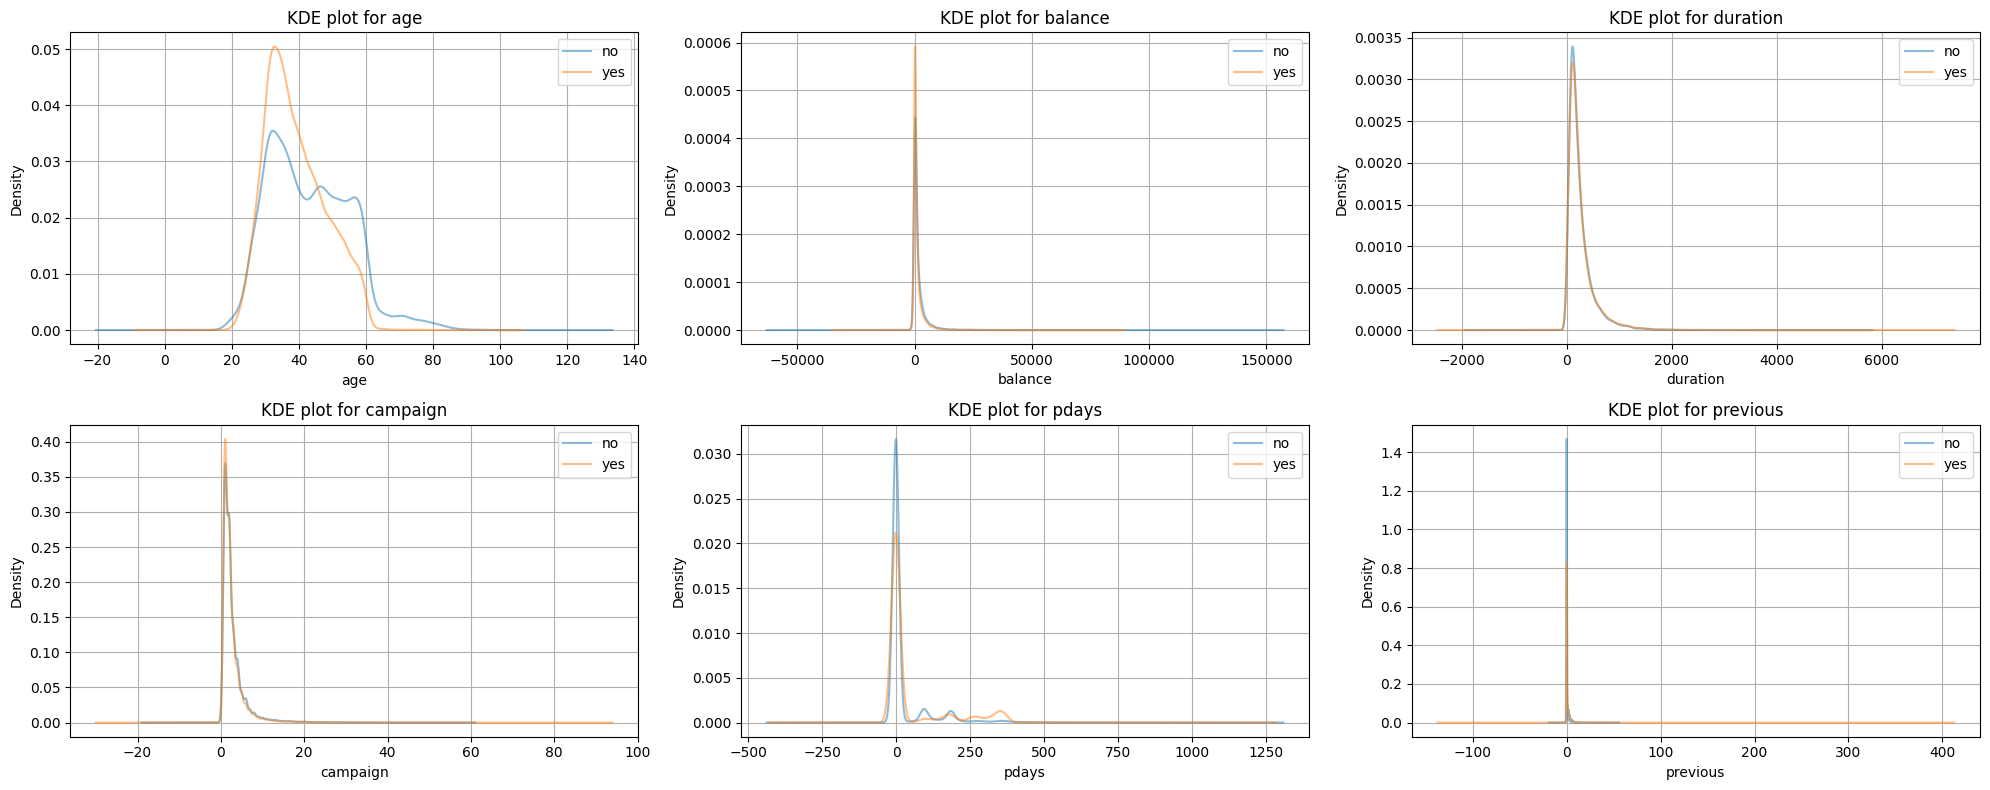

In [68]:
n_cols = 3
n_rows = (len(con_features) // n_cols) + (1 if len(con_features) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

for i, c in enumerate(con_features):
    ax = axes[i // n_cols, i % n_cols]
    df.groupby("housing")[c].plot(kind="kde", alpha=0.5, ax=ax, legend=True)
    ax.set_title(f"KDE plot for {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()

* các khách hàng vay nợ mua nhà ảnh hưởng qua age, balance, previous

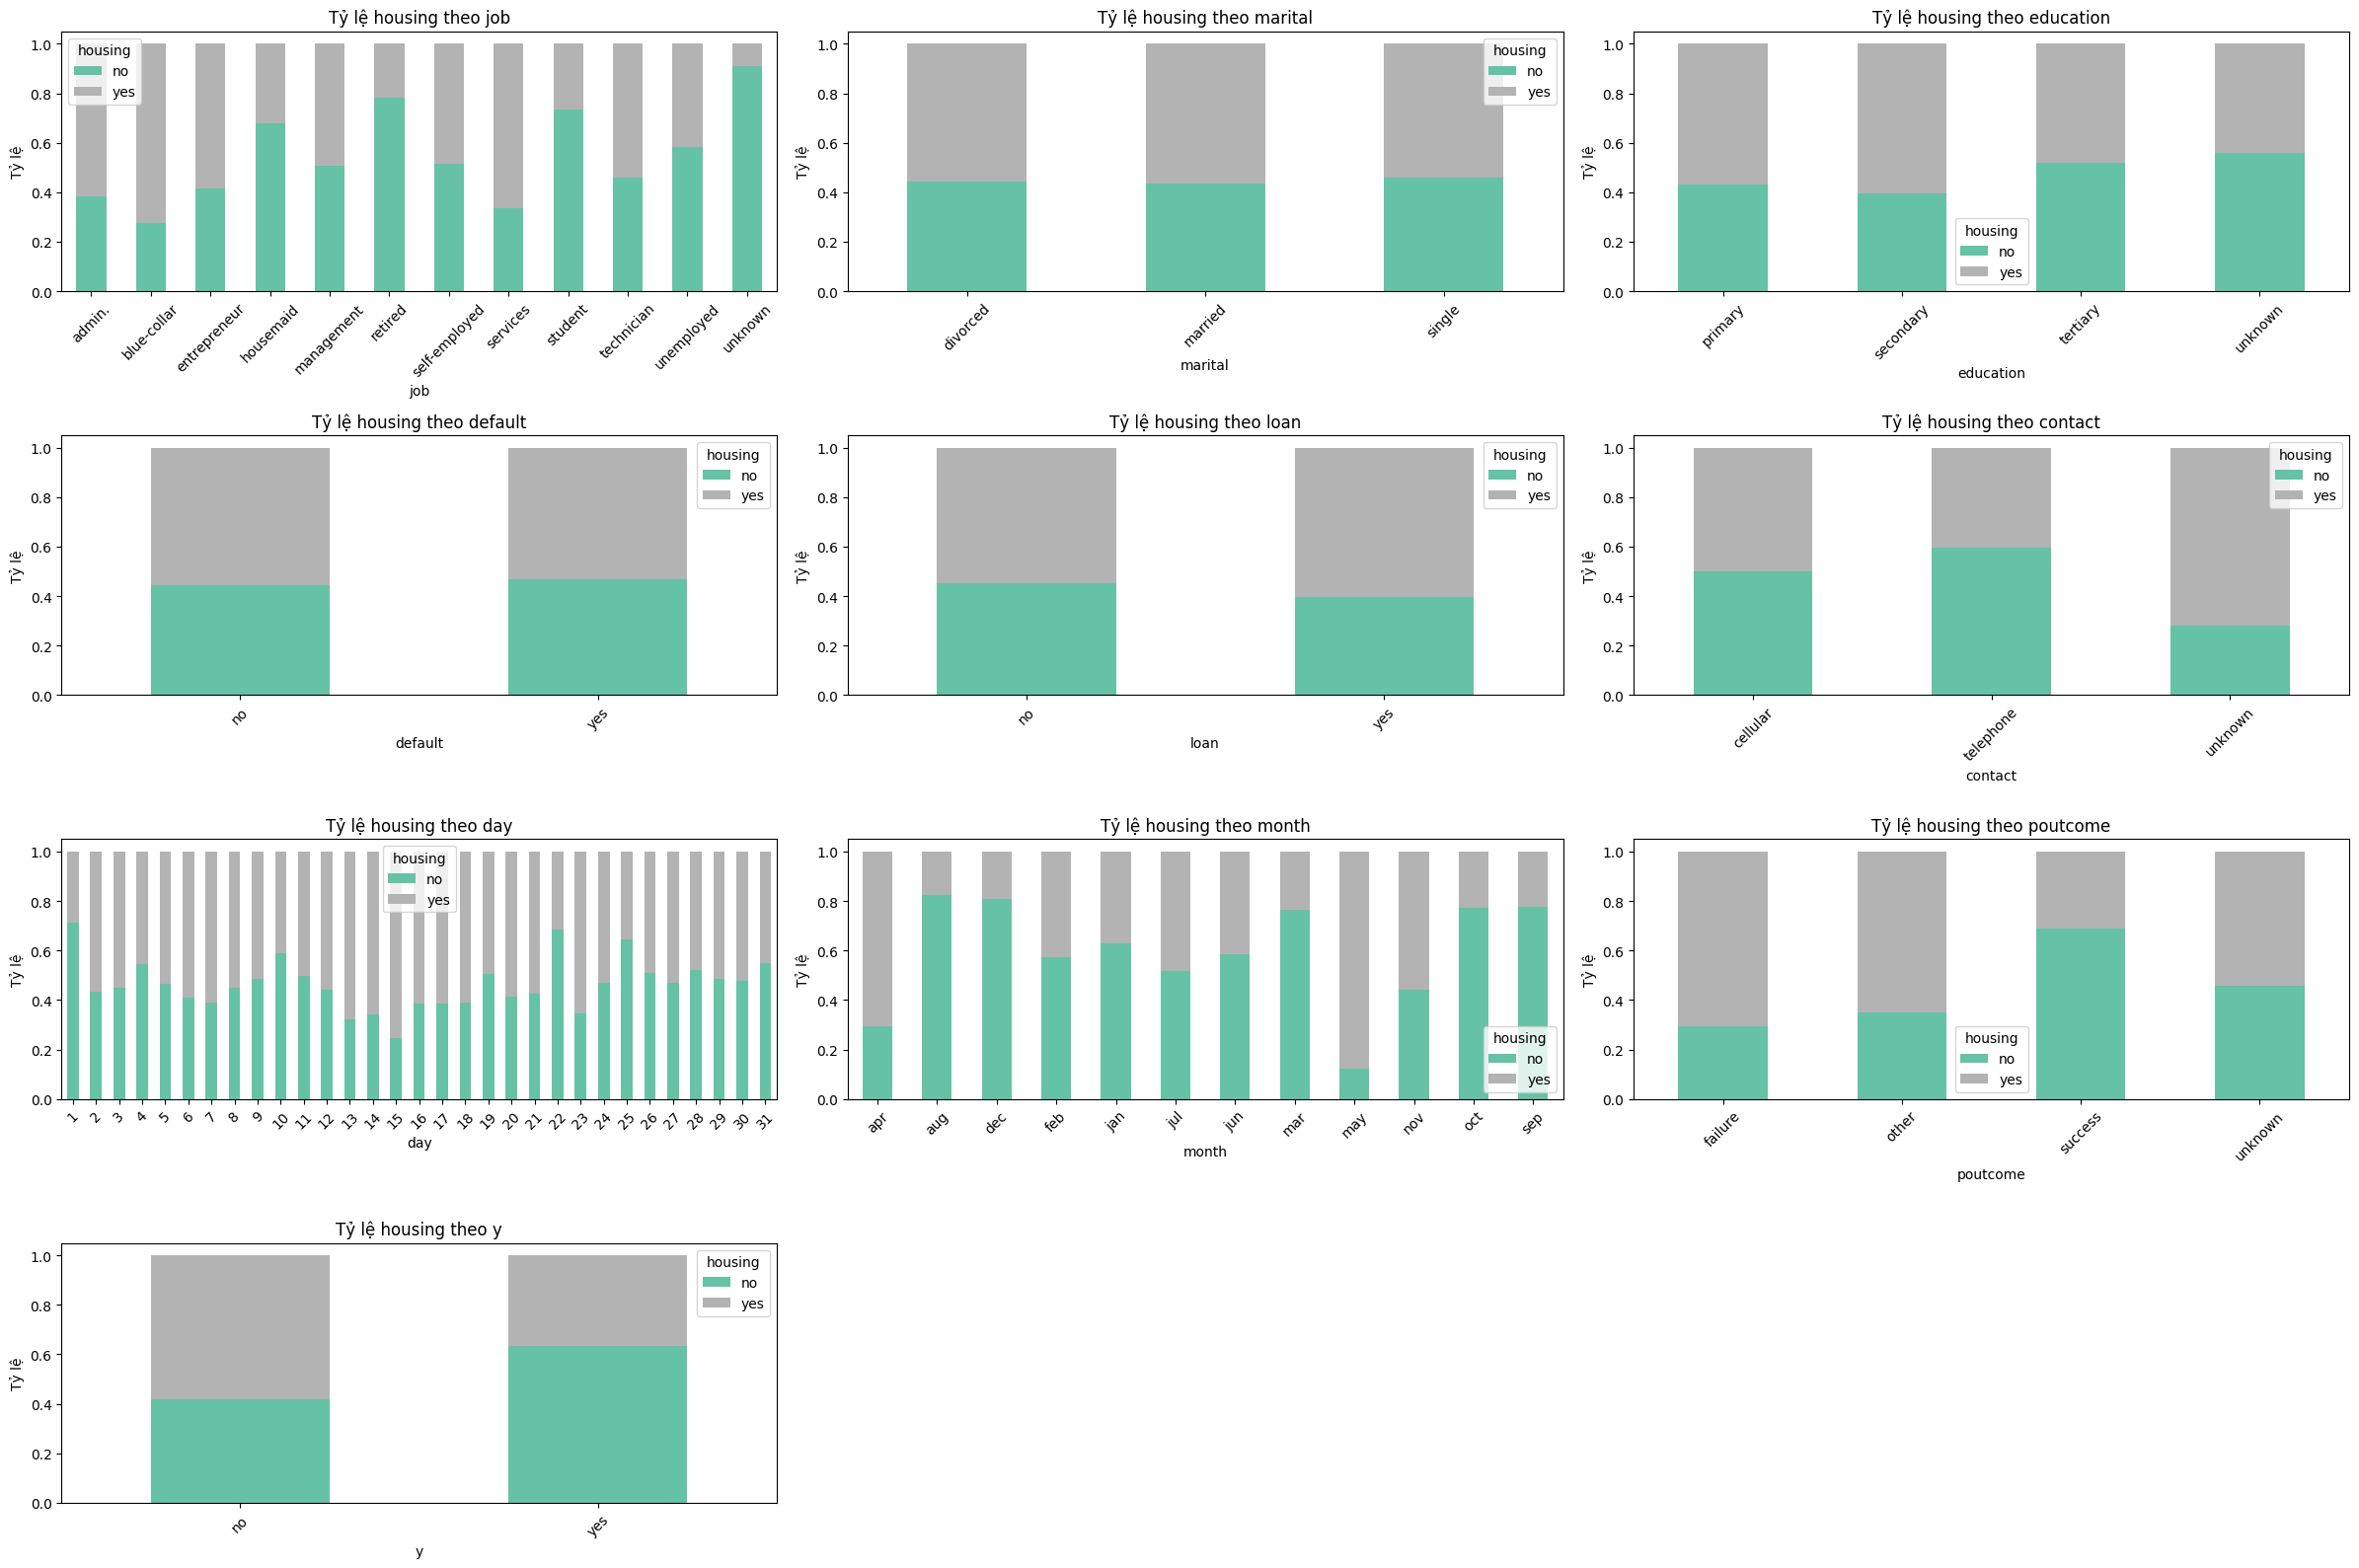

In [79]:
cols = [col for col in obj_features if col != "housing"]
n = len(cols)
n_cols = 3 
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(cols):
    cross_tab = pd.crosstab(df[col], df["housing"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap="Set2")
    axes[idx].set_title(f"Tỷ lệ housing theo {col}")
    axes[idx].set_ylabel("Tỷ lệ")
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# loan (có vay tiêu dùng không)

In [69]:
df.groupby("loan")[con_features].mean()

,age,balance,duration,campaign,pdays,previous
loan,,,,,,
no,41.008823,1474.453631,259.559275,2.750336,41.192983,0.591435
yes,40.555632,774.309912,250.845389,2.834622,34.982054,0.522087


In [72]:
df.groupby("loan")[con_features].mean().std()

age           0.320455
balance     495.076372
duration      6.161648
campaign      0.059599
pdays         4.391790
previous      0.049036
dtype: float64

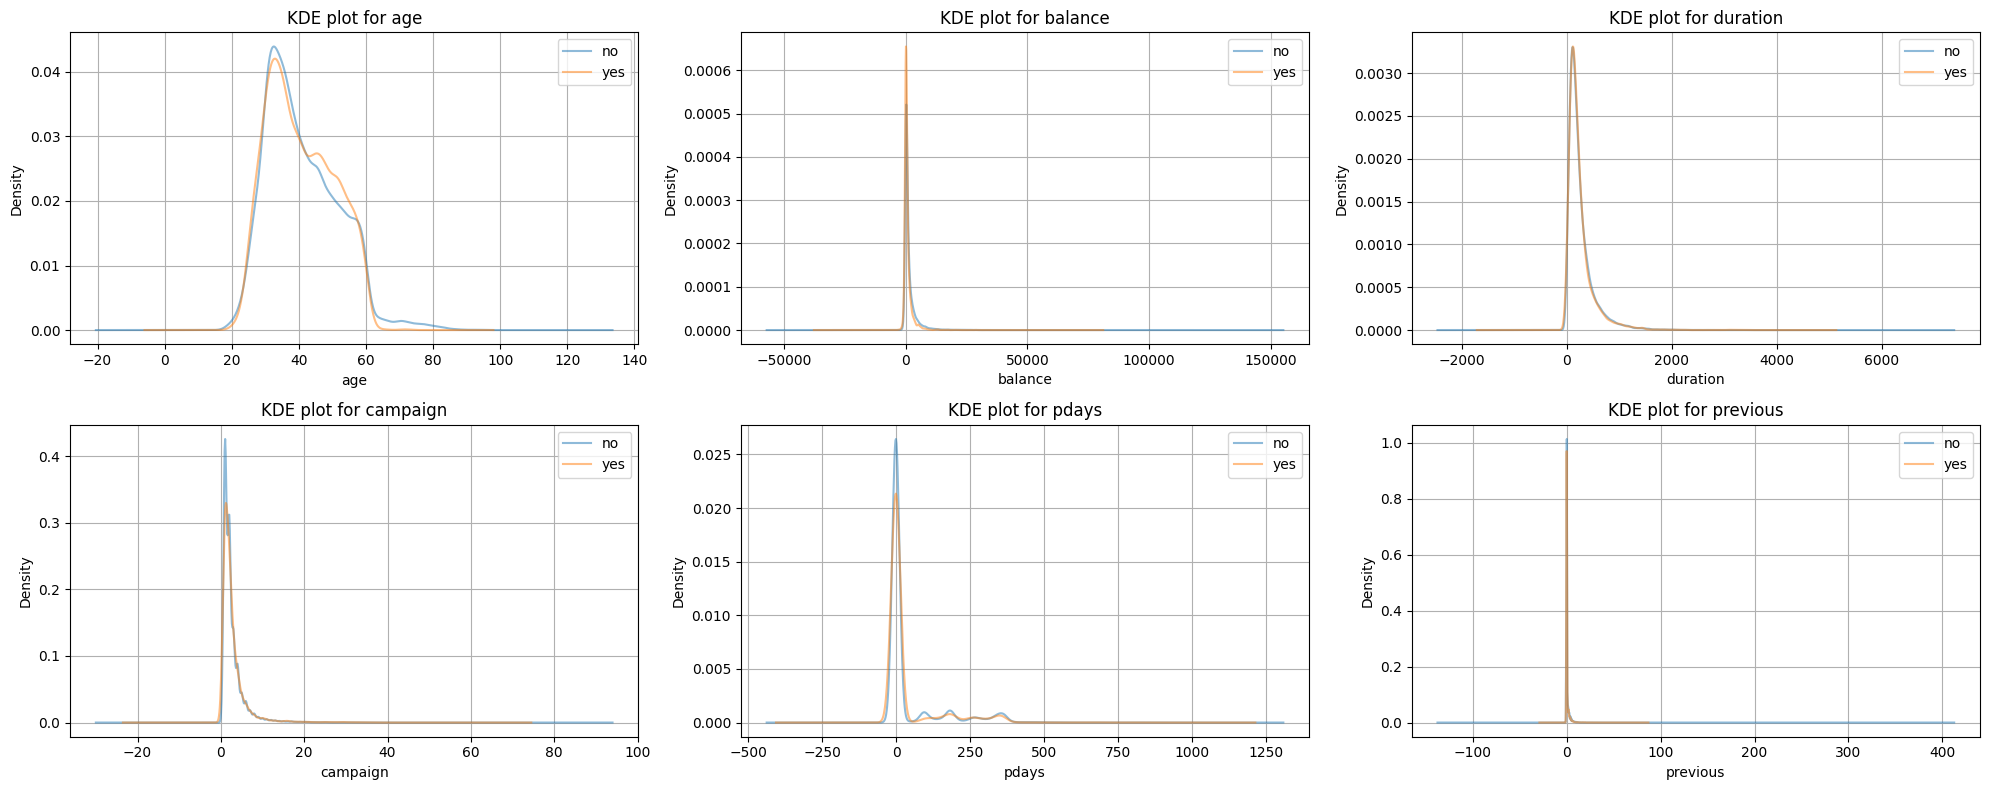

In [75]:
n_cols = 3
n_rows = (len(con_features) // n_cols) + (1 if len(con_features) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

for i, c in enumerate(con_features):
    ax = axes[i // n_cols, i % n_cols]
    df.groupby("loan")[c].plot(kind="kde", alpha=0.5, ax=ax, legend=True)
    ax.set_title(f"KDE plot for {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()

* phân bố đồng đều ngoại trừ balance

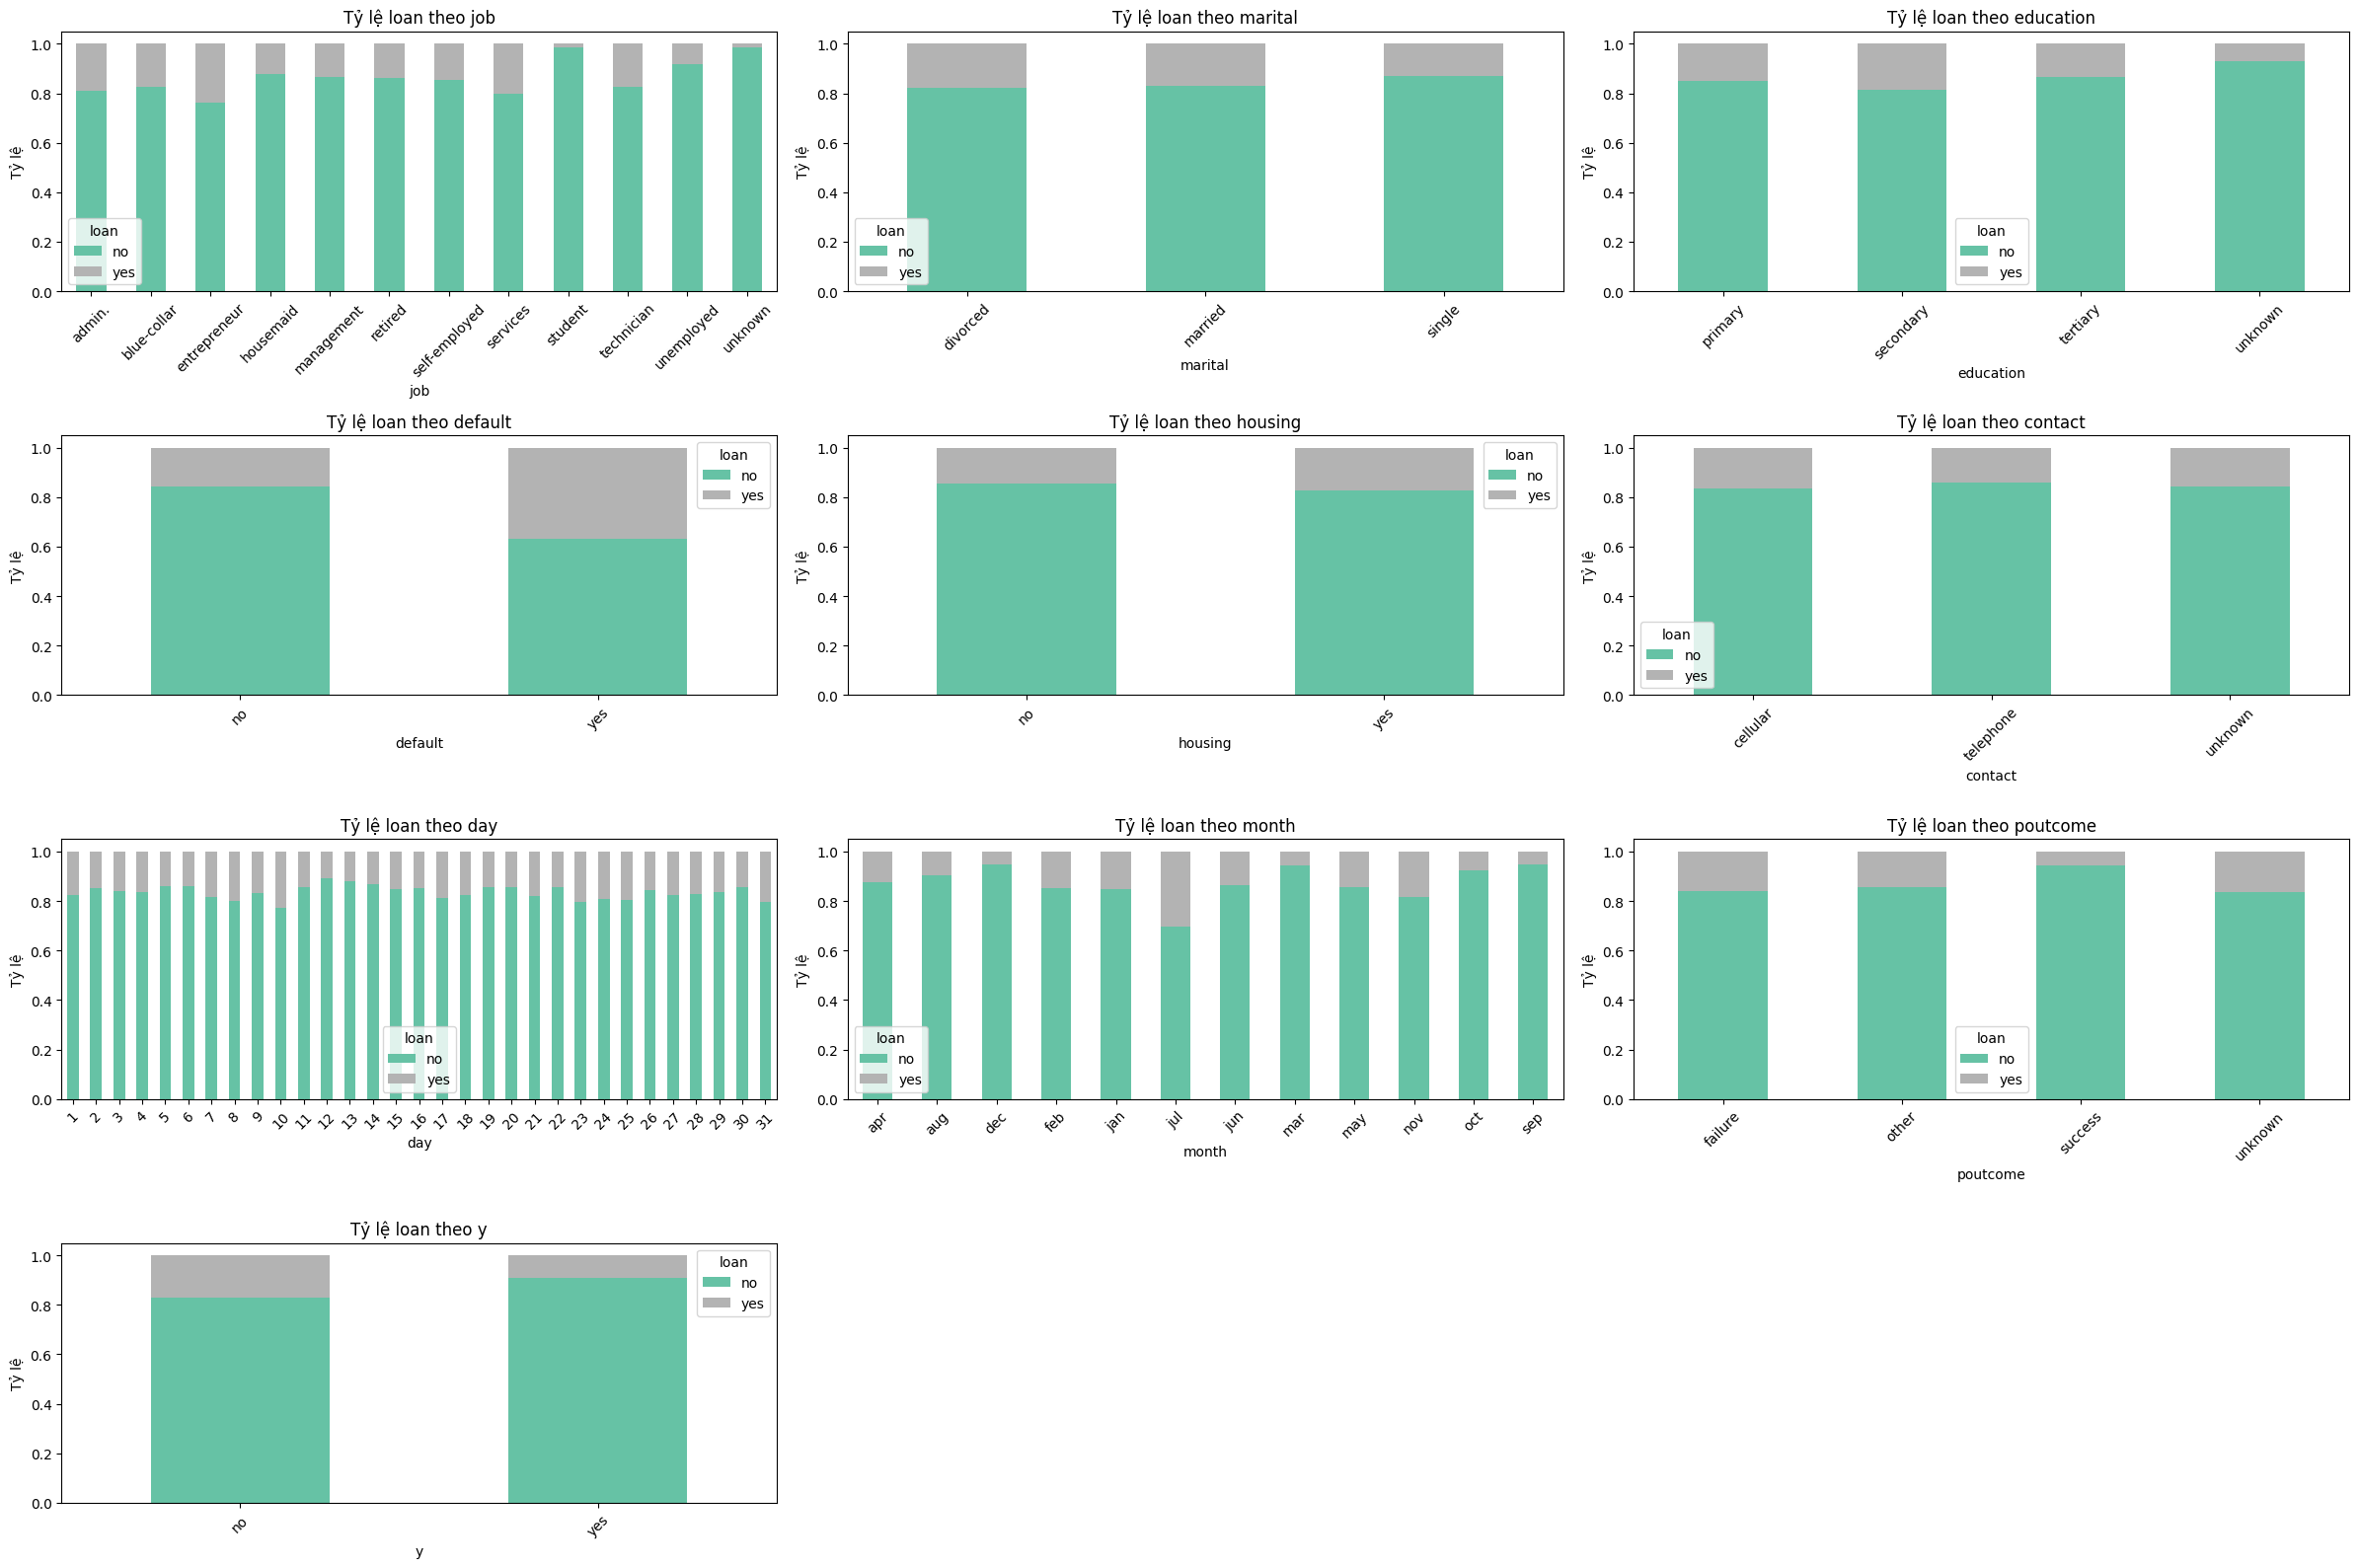

In [80]:
cols = [col for col in obj_features if col != "loan"]
n = len(cols)
n_cols = 3 
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(cols):
    cross_tab = pd.crosstab(df[col], df["loan"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap="Set2")
    axes[idx].set_title(f"Tỷ lệ loan theo {col}")
    axes[idx].set_ylabel("Tỷ lệ")
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# poutcome (Kết quả của chiến dịch trước)

In [70]:
df.groupby("poutcome")[con_features].mean()

,age,balance,duration,campaign,pdays,previous
poutcome,,,,,,
failure,40.786166,1465.805550,244.185880,1.980820,241.509284,2.896552
other,39.752174,1487.411413,255.715217,2.461413,229.683696,4.009239
success,42.964924,1939.301125,316.868961,1.806089,163.259431,3.075447
unknown,40.932114,1318.722043,257.738332,2.921886,-0.962039,0.000460


In [73]:
df.groupby("poutcome")[con_features].mean().std()

age           1.344240
balance     268.340152
duration     32.710510
campaign      0.502792
pdays       111.666750
previous      1.733379
dtype: float64

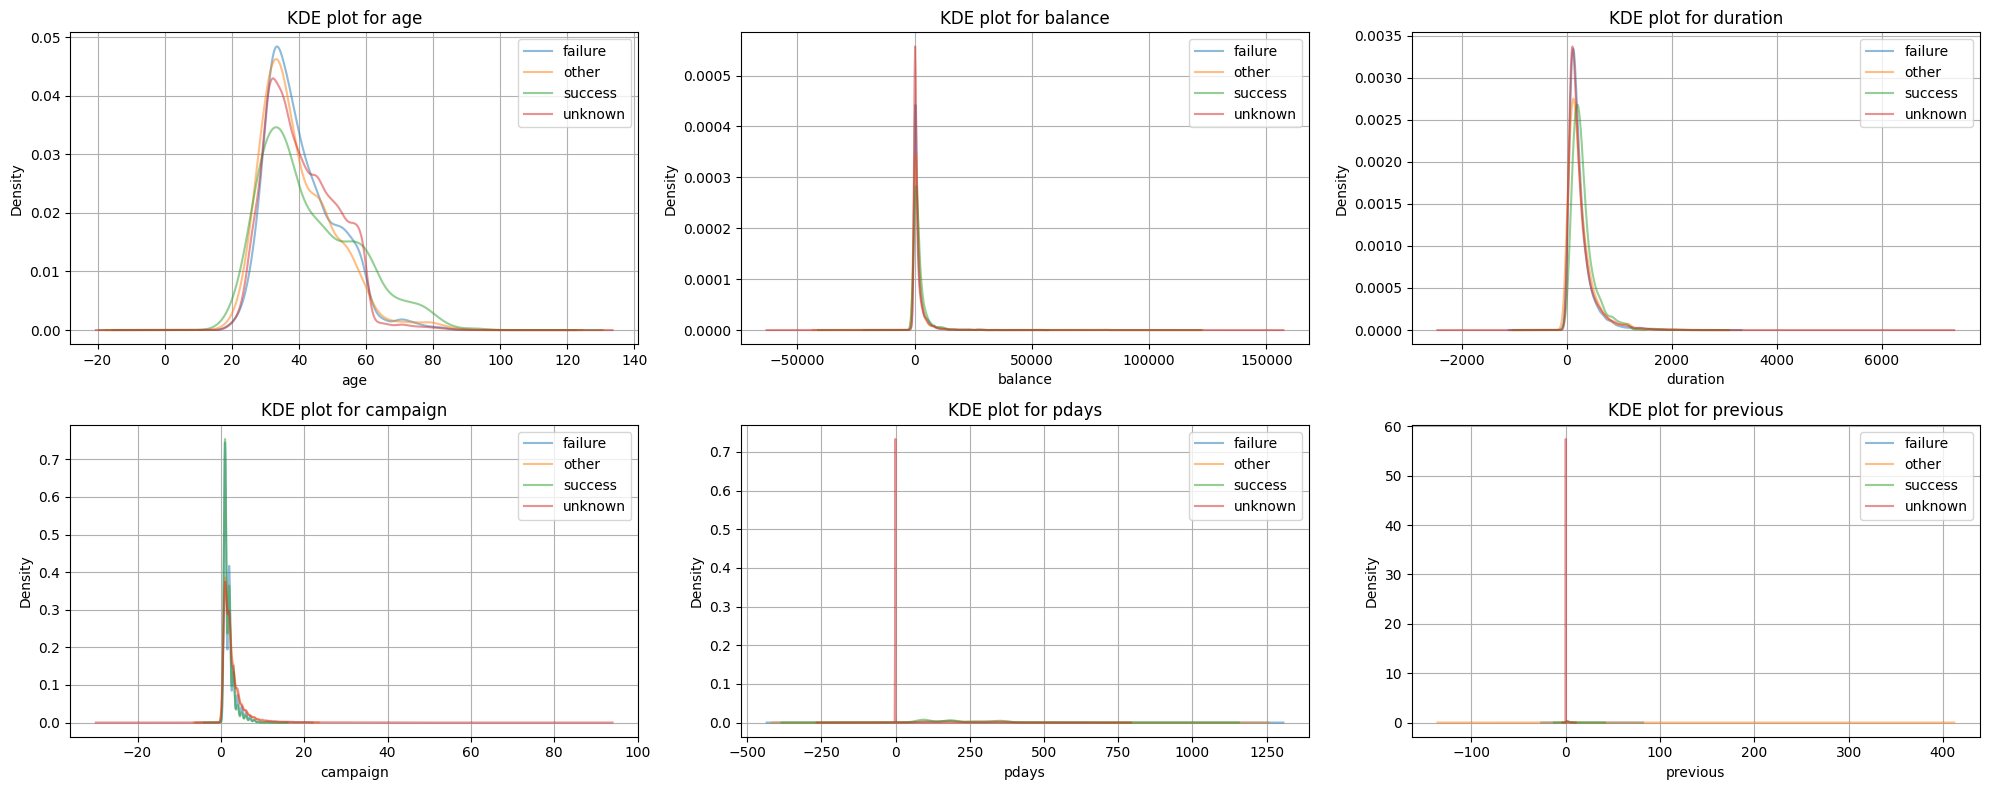

In [76]:
n_cols = 3
n_rows = (len(con_features) // n_cols) + (1 if len(con_features) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

for i, c in enumerate(con_features):
    ax = axes[i // n_cols, i % n_cols]
    df.groupby("poutcome")[c].plot(kind="kde", alpha=0.5, ax=ax, legend=True)
    ax.set_title(f"KDE plot for {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()

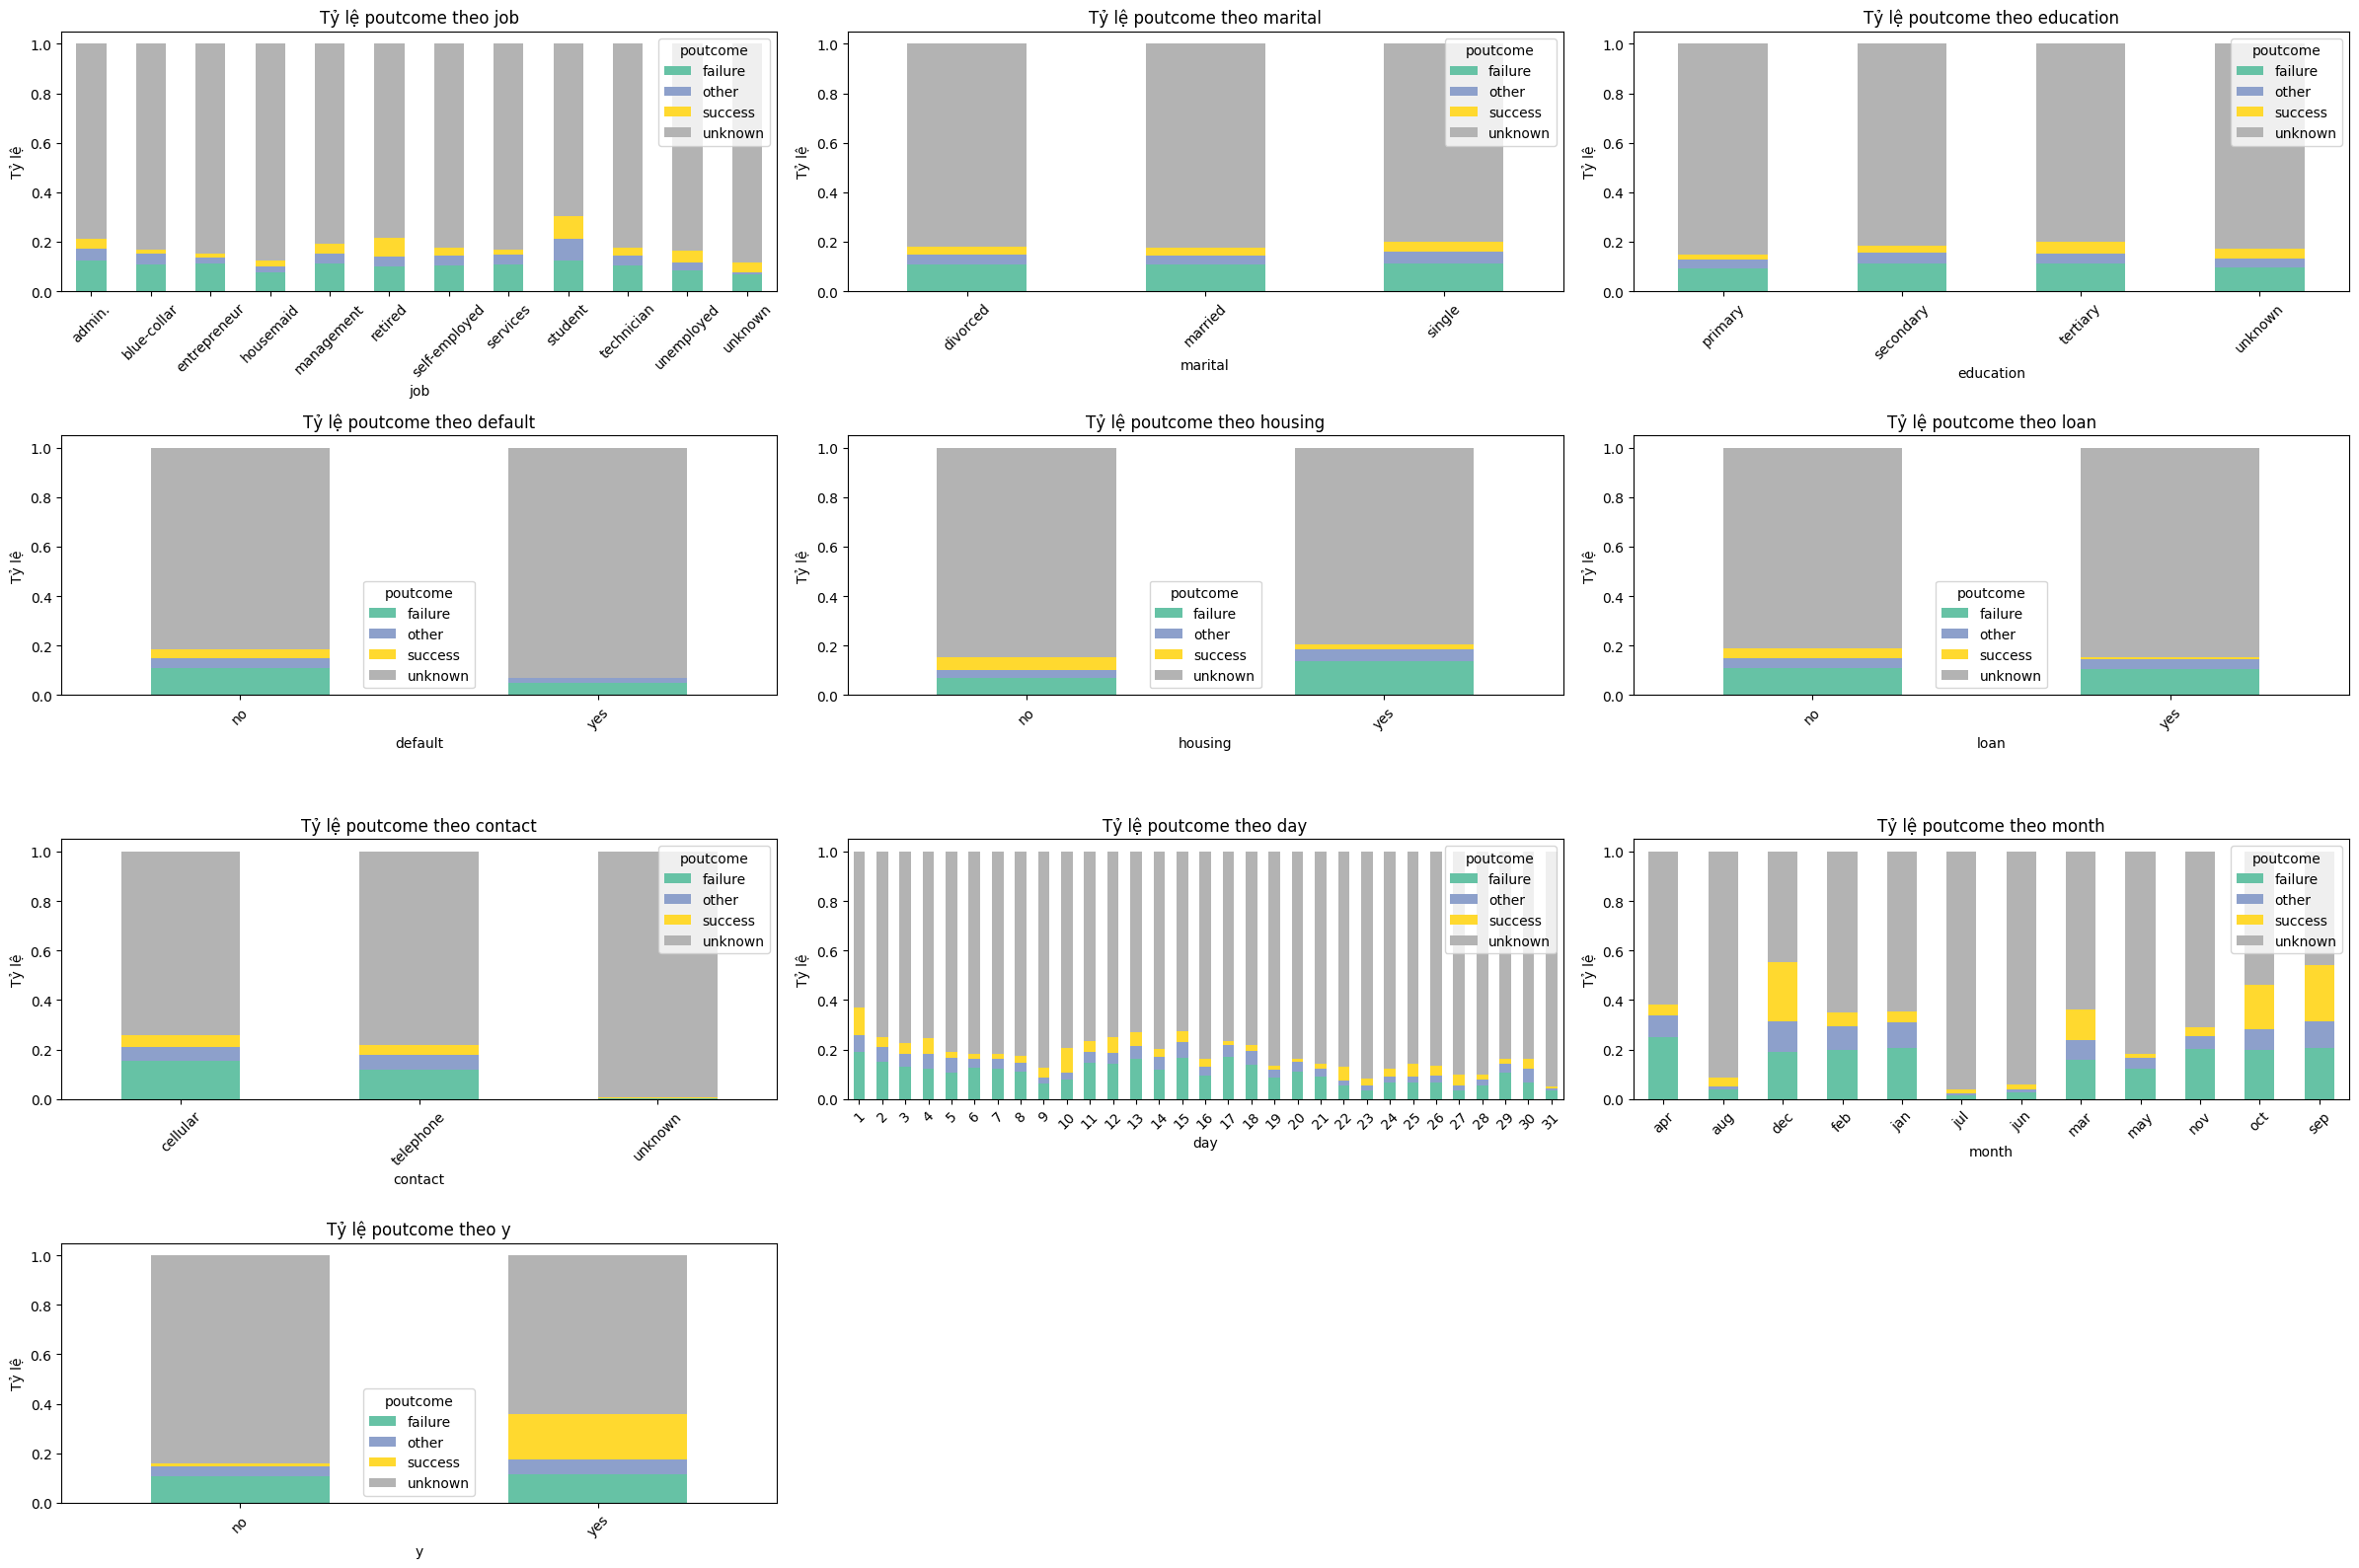

In [81]:
cols = [col for col in obj_features if col != "poutcome"]
n = len(cols)
n_cols = 3 
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(cols):
    cross_tab = pd.crosstab(df[col], df["poutcome"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap="Set2")
    axes[idx].set_title(f"Tỷ lệ poutcome theo {col}")
    axes[idx].set_ylabel("Tỷ lệ")
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# y (TARGET Khách hàng có đăng ký gửi tiết kiệm không)

In [71]:
df.groupby("y")[con_features].mean()

,age,balance,duration,campaign,pdays,previous
y,,,,,,
no,40.838986,1303.714969,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354


In [74]:
df.groupby("y")[con_features].mean().std()

age           0.587665
balance     353.944382
duration    223.524774
campaign      0.498724
pdays        22.826536
previous      0.472488
dtype: float64

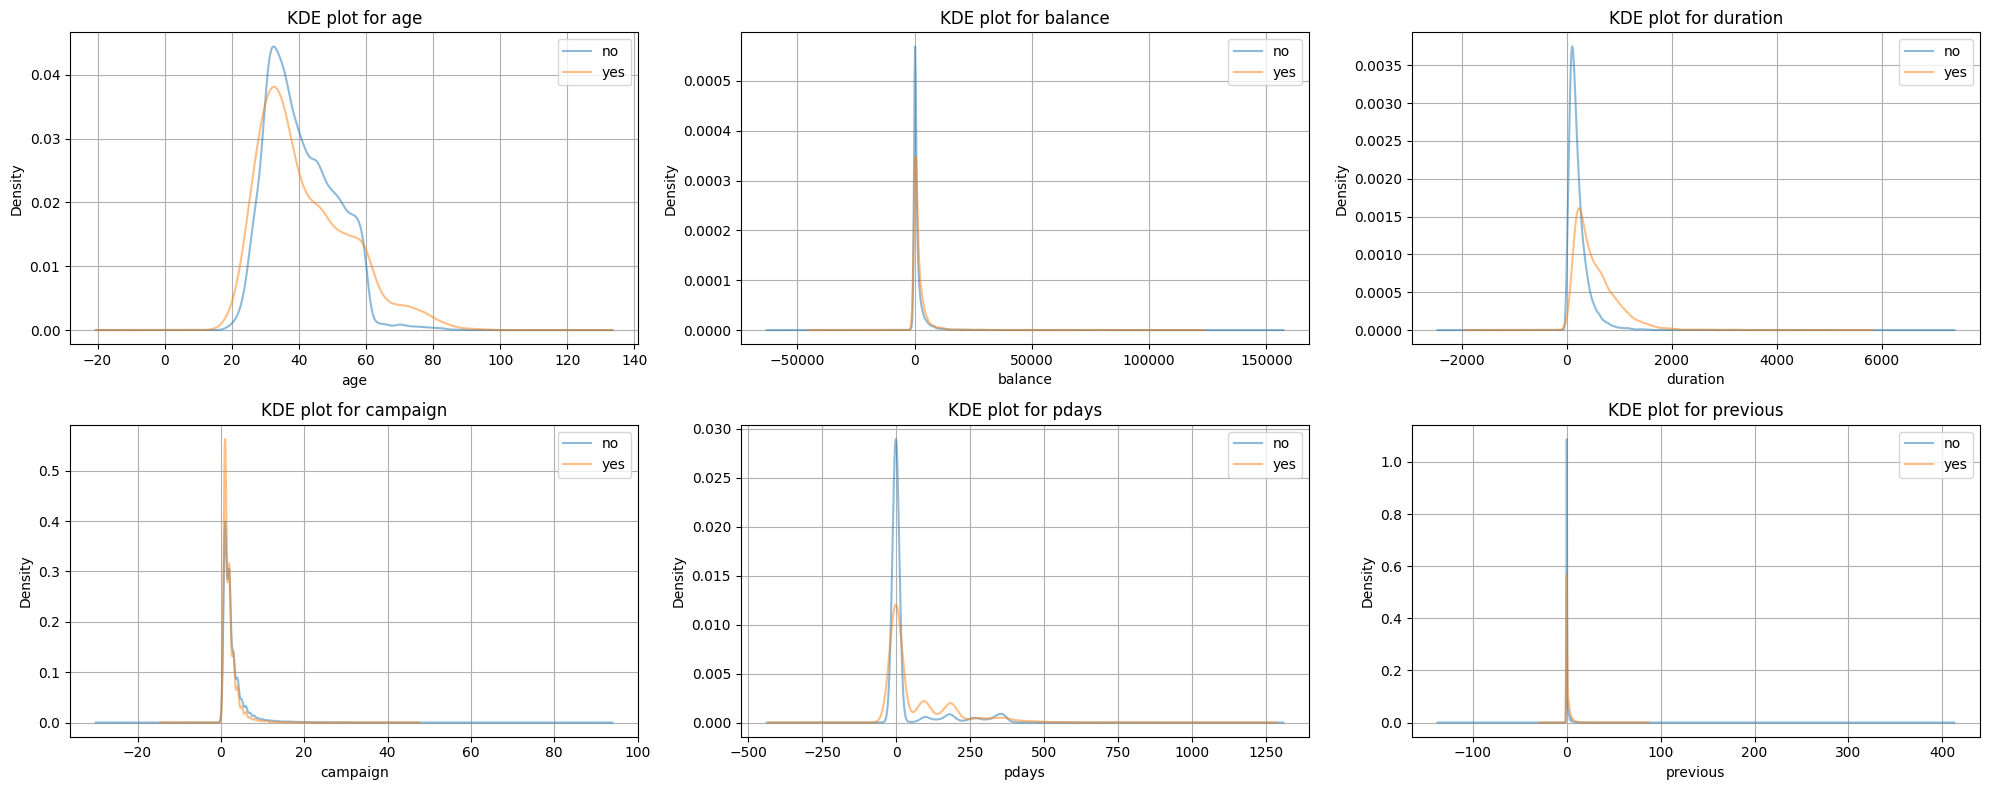

In [77]:
n_cols = 3
n_rows = (len(con_features) // n_cols) + (1 if len(con_features) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

for i, c in enumerate(con_features):
    ax = axes[i // n_cols, i % n_cols]
    df.groupby("y")[c].plot(kind="kde", alpha=0.5, ax=ax, legend=True)
    ax.set_title(f"KDE plot for {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.show()

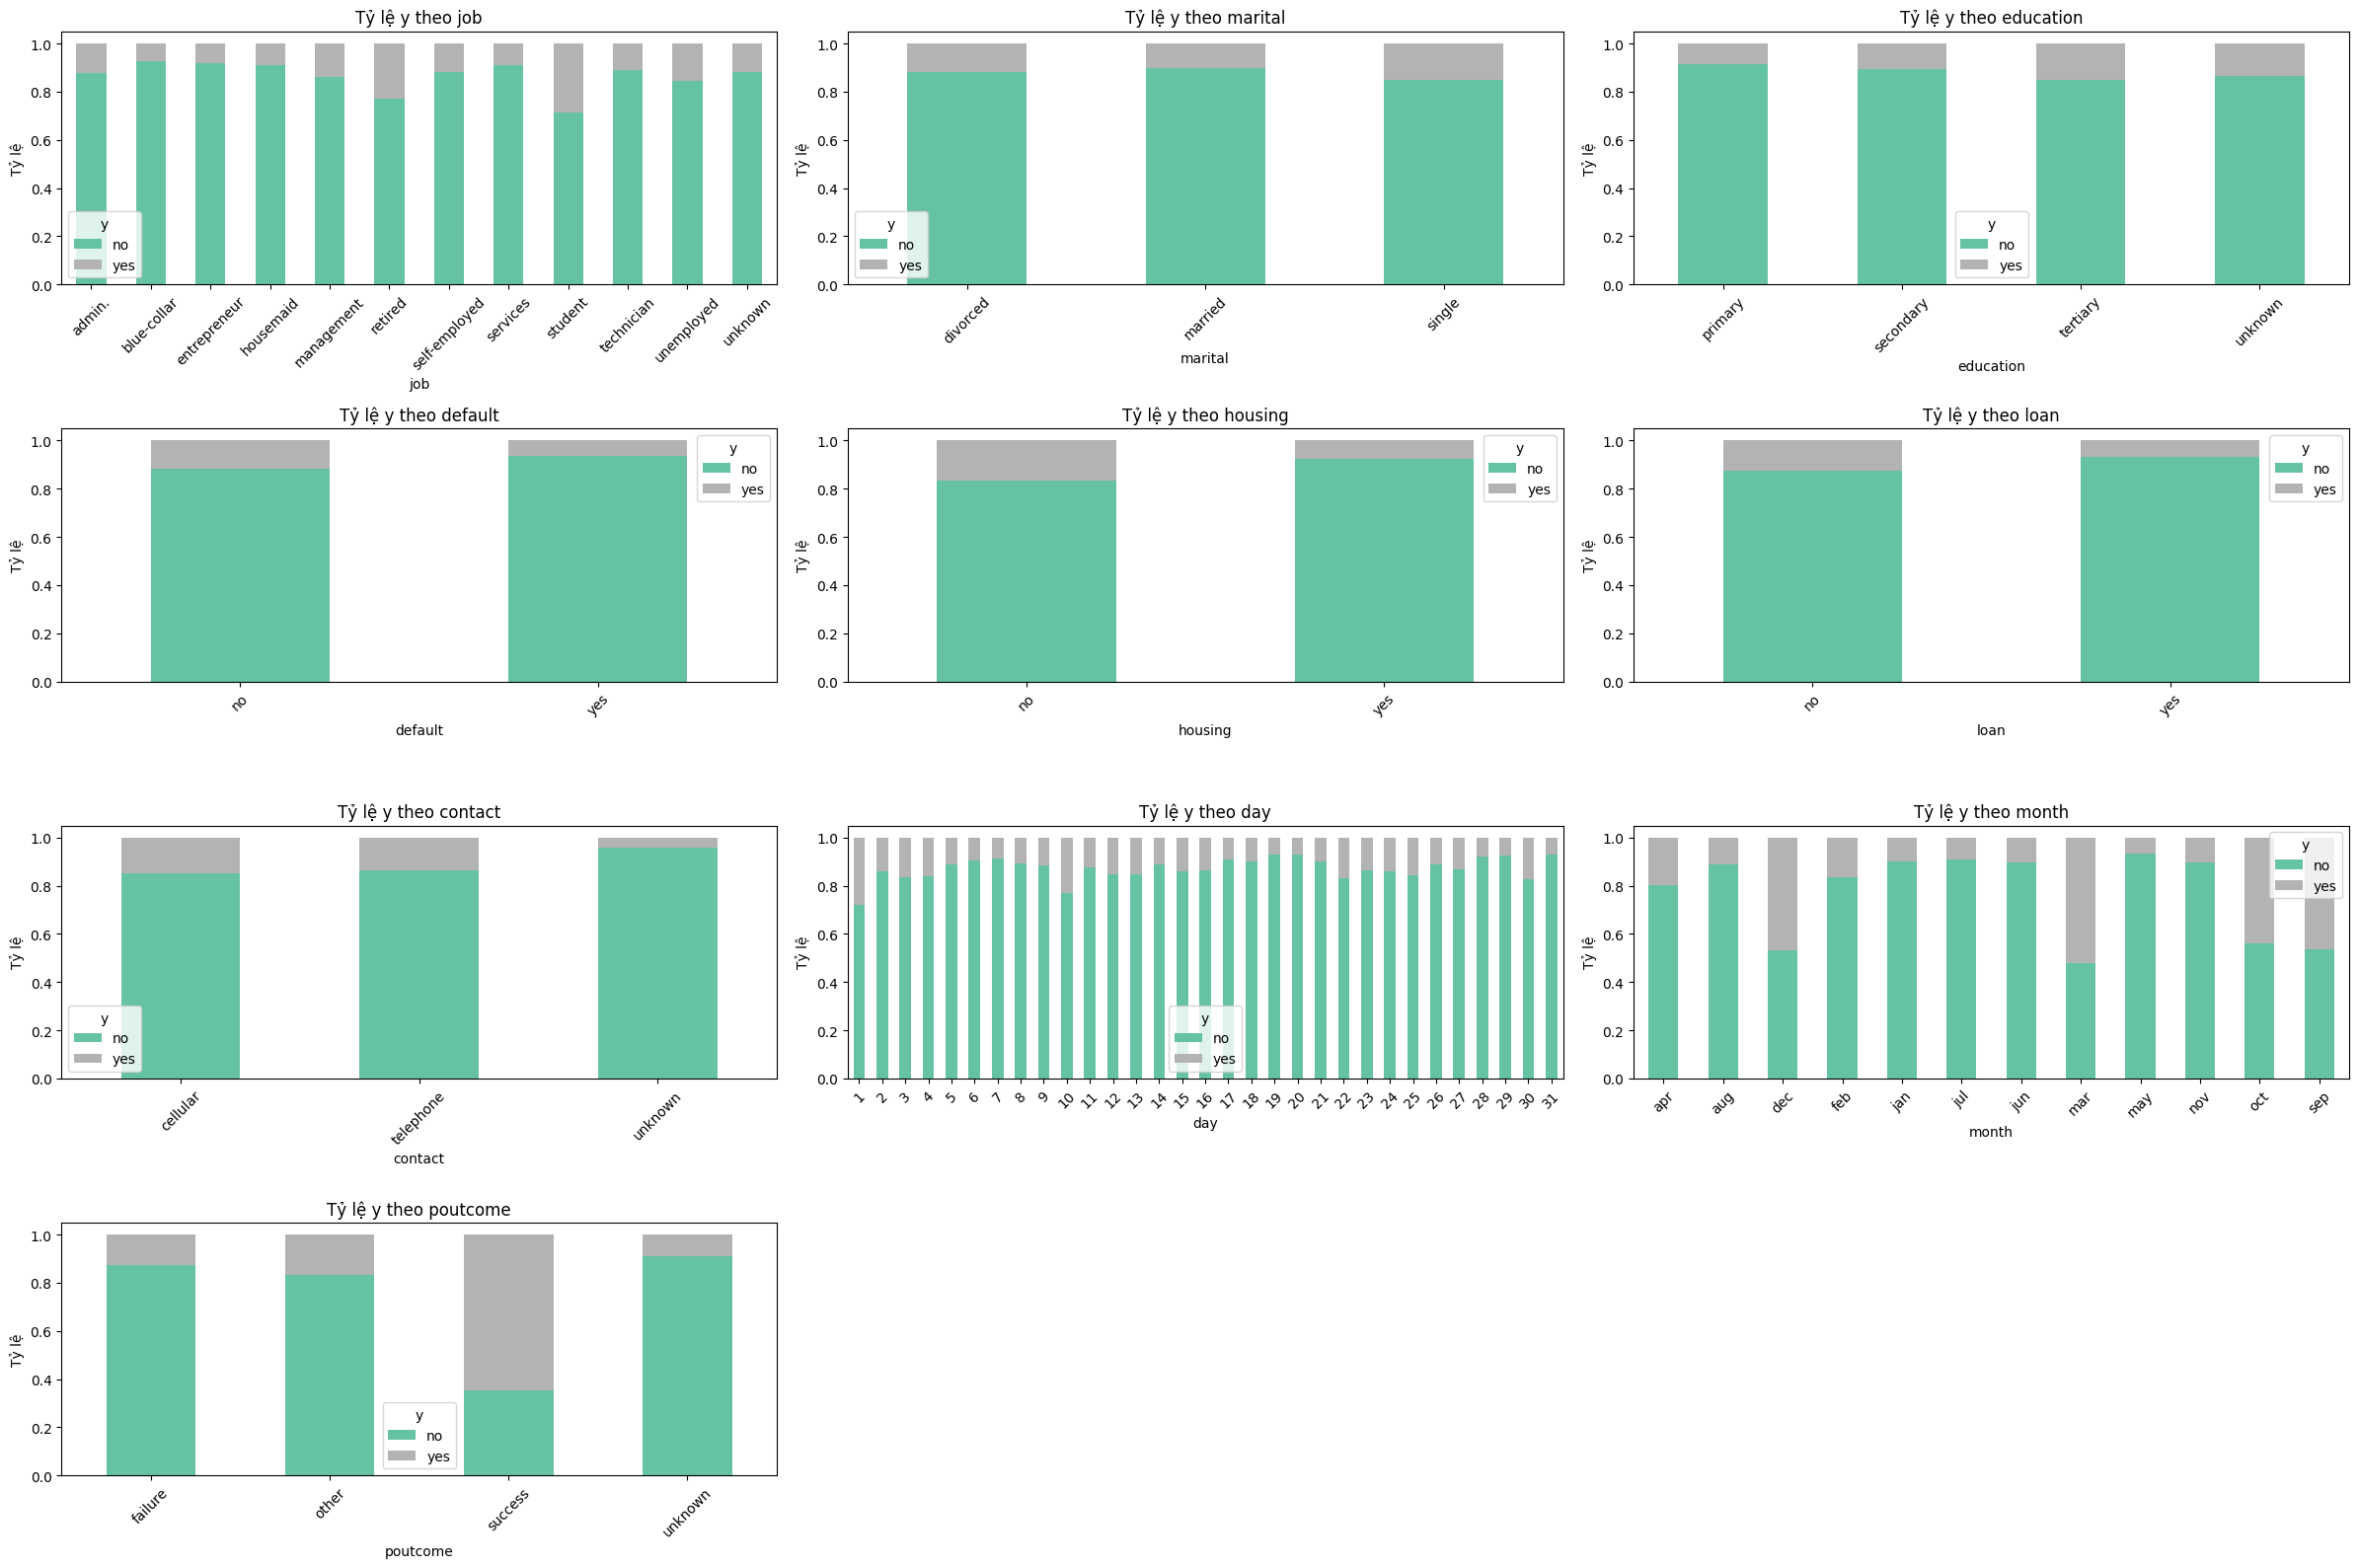

In [82]:
cols = [col for col in obj_features if col != "y"]
n = len(cols)
n_cols = 3 
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(cols):
    cross_tab = pd.crosstab(df[col], df["y"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap="Set2")
    axes[idx].set_title(f"Tỷ lệ y theo {col}")
    axes[idx].set_ylabel("Tỷ lệ")
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()